In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Read the titanic data set into a pandas dataframe.

In [2]:
df = pd.read_csv("titanic_train.csv", header=0)

Look at the first 5 rows.

In [58]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


What is the size of the data set? (rows and columns)

In [21]:
r, c = df.shape
print 'Rows:', r
print 'Columns:', c

Rows: 891
Columns: 12


How many people survived? What percentage of people survived?

In [24]:
print 'Survived:', df['Survived'].sum()
print 'Survival percentage:', 100.0 * df['Survived'].sum() / df.shape[0]

Survived: 342
Survival percentage: 38.3838383838


What percentage of passengers are male? female?

In [30]:
print 'Male:', 100.0 * df[df['Sex'] == 'male'].shape[0] / df.shape[0]
print 'Female:', 100.0 * df[df['Sex'] == 'female'].shape[0] / df.shape[0]

Male: 64.758698092
Female: 35.241301908


What is the survival rate of male passengers? female passengers?

In [35]:
print 'Male survival rate:', 100.0 * df[df['Sex'] == 'male']['Survived'].sum() / df[df['Sex'] == 'male'].shape[0]
print 'Female survival rate:', 100.0 * df[df['Sex'] == 'female']['Survived'].sum() / df[df['Sex'] == 'female'].shape[0]

Male survival rate: 18.8908145581
Female survival rate: 74.2038216561


How many different cabin classes, Pclass, are there?

In [40]:
len(df['Pclass'].unique())

3

What percent of the passengers are in each class?

In [48]:
for i in range(1,4):
    print i, 100.0 * len(df[df['Pclass'] == i]) / df.shape[0]

1 24.2424242424
2 20.6509539843
3 55.1066217733


What is the survival rate within each class?

In [56]:
for i in range(1,4):
    print i, 100.0 * len(df[(df['Pclass'] == i) & (df['Survived'] == 1)]) / len(df[df['Pclass'] == i])

1 62.962962963
2 47.2826086957
3 24.2362525458


Create a histogram of ages split by sex and survival.

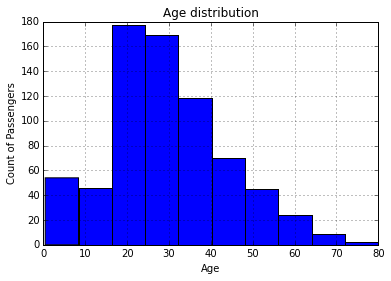

In [5]:
df.Age.dropna().hist()
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count of Passengers')

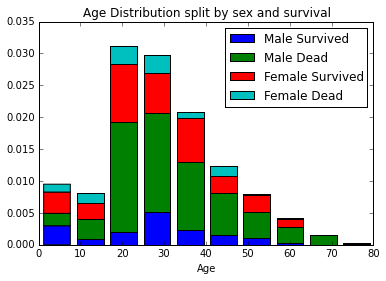

In [19]:
male_survived = df.Age[(df.Sex == 'male') & (df.Survived == 1)]
male_dead = df.Age[(df.Sex == 'male') & (df.Survived == 0)]
female_survived = df.Age[(df.Sex == 'female') & (df.Survived == 1)]
female_dead = df.Age[(df.Sex == 'female') & (df.Survived == 0)]
plt.hist([male_survived, male_dead, female_survived, female_dead], range = (df.Age.min(),df.Age.max()), stacked = True, bins = 10, normed = True)
plt.xlabel("Age")    
plt.title("Age Distribution split by sex and survival")
plt.legend(('Male Survived', 'Male Dead', 'Female Survived', 'Female Dead'),loc='best') 

Create a boxplot for age split by class and sex.

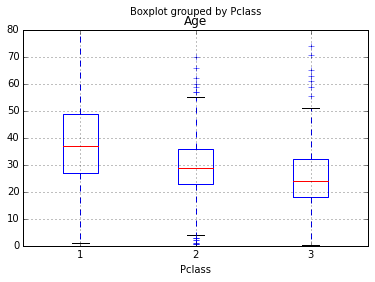

In [20]:
df.boxplot(column='Age',by='Pclass')

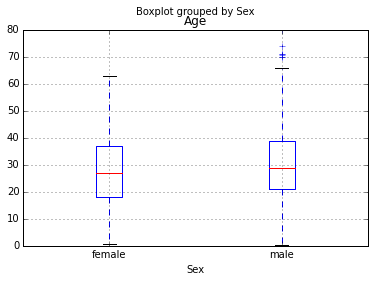

In [21]:
df.boxplot(column='Age',by='Sex')

For each class create a histogram plot of ages split by suvivor or not. ( You will have one figure for each class. Each figure will have two histograms on it. One for survivors and one for non-survivors where the survivors are colored blue and non-survivors colored red)

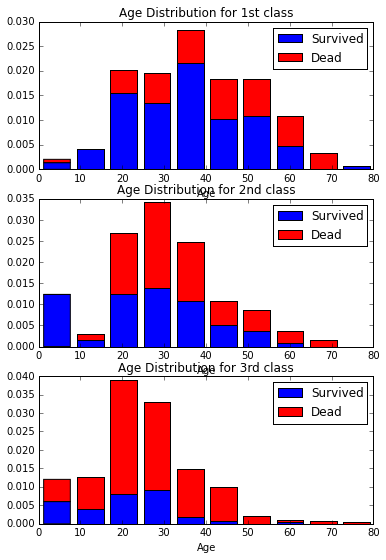

In [34]:
fig = plt.figure(figsize=(6,9))

# Pclass 1
ax = plt.subplot2grid((3,1),(0,0))
survived = df.Age[(df.Survived == 1) & (df.Pclass == 1)].dropna()
dead = df.Age[(df.Survived == 0) & (df.Pclass == 1)].dropna()
plt.hist([survived, dead], range = (df.Age.min(),df.Age.max()), stacked = True, bins = 10, normed = True, color=['b','r'])
plt.xlabel("Age")
plt.title("Age Distribution for 1st class")
plt.legend(('Survived', 'Dead'),loc='best') 

# Pclass 2
ax = plt.subplot2grid((3,1),(1,0))
survived = df.Age[(df.Survived == 1) & (df.Pclass == 2)].dropna()
dead = df.Age[(df.Survived == 0) & (df.Pclass == 2)].dropna()
plt.hist([survived, dead], range = (df.Age.min(),df.Age.max()), stacked = True, bins = 10, normed = True, color=['b','r'])
plt.xlabel("Age")
plt.title("Age Distribution for 2nd class")
plt.legend(('Survived', 'Dead'),loc='best') 

# Pclass 3
ax = plt.subplot2grid((3,1),(2,0))
survived = df.Age[(df.Survived == 1) & (df.Pclass == 3)].dropna()
dead = df.Age[(df.Survived == 0) & (df.Pclass == 3)].dropna()
plt.hist([survived, dead], range = (df.Age.min(),df.Age.max()), stacked = True, bins = 10, normed = True, color=['b','r'])
plt.xlabel("Age")
plt.title("Age Distribution for 3rd class")
plt.legend(('Survived', 'Dead'),loc='best') 

Discuss anything interesting you found. Where there any surprises? Are there any data issues you found? If you wanted to predict survival or not what do you think we be the most useful?

- Lots of missing values in the `Ticket` and `Cabin` fields, better to drop these columns.
- Surprisingly, lots of people traveling for free across all age groups and classes! (Probably a discrepancy in the dataset)
- For predicting survival, sex, class, age and fare play major roles. We can probably construct a decision tree using ID3.